#  Credit Card Payment Risk Analysis

This is a supervised statistical/machine learning model (classification) to predict which clients are able to honor their debt.

It was used Python 3.8 and jupyter notebook. The following libraries have been used:
    
- Pandas
- NumPy
- Scikit-learn
- Matplotlib
- Seaborn
- Imblearn
- Pickle

We are going to use the models:
- kNN
- Random Forest
- Logistic Regression
- Naive Bayes
- Support Vector Machines (SVM)

Dataset Information:
 - 26 features
 - 64591 samples
 - 2 classes

#### The goal is to predict the default target:

- False - Who has paid the bill (here is the negative)
- True - Who has not been able to pay the bill (here is the positive)

## Workflow

   ### (Part I) - Exploratory and Preprocessing Data Analysis

- **1 Importing the Libraries and loading the dataset** 
    - Imports and dataset loading
    - Initial assessment of the dataset
    - Analyzing the possible classes
- **2 Dealing with the Missing and Inconsistent Values**
    - Removing the NaN values and transforming the targets 
    - Transforming datetime in integer and calculating the difference between payment and loan datetime
    - Removing inconsistent data
    - Replacing the missing values    
- **3 Exploring the data**
    - Analyzing the features
    - Inpecting the degree of skewness and tailedness in each feature (which feature has a normal distribution?)
- **4 Dealing with outliers**
    - Removing the outliers using the Z-score
    - Removing the outliers using Quantiles (IQR score)
    - Checking the distribution of labels after removing the outliers
- **5 Correlation and Feature Importance (which feature could affect the result the most?)**
    - Correlation
    - Feature Importance
- **6 Splitting the dataset in train and test**
    - Applying the SMOTE technique to deal with the imbalanced datasets
- **7 Feature Scaling**
        
### (Part II) - Implementing and Training the model

- **8 Training the baseline model**
    - Setting the model (kNN) and training
    - Setting the model (Logistic Regression) and training
    - Setting the model (Random Forest) and training
    - Setting the model (Naive Bayes) and training
    - Setting the model (Support Vector Machines SVM) and training
- **9 Cross-validation (choosing the best models)**
    - Estimating the Recall using a 10-Fold cross-validation
- **10 Perfoming the hyperparameter optimization for the best models**
    - Using 10-Fold Cross-Validation in RandomizedSearchCV
    - Training the model with the help of the best hyperparameters
- **11 Combining the best two models to perhaps boost the performance**
    - Setting the combined model (kNN and Random Forest) and training
- **12 Evaluating the model's real performance (test dataset)**
    - Making predictions in the test dataset
    - The final performance: the confusion matrices
    - Classification report for Random Forest
    - Classification report for kNN
    - Classification report for the combined models
- **13 Summary**
- **14 Saving the Classifier (Final Model)**
    - Saving the best trained model
    - Saving the predict class probabilities for test dataset



## 1 Importing the Libraries and loading the dataset 

#### 1.1 Imports and dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('dataset.csv')

In [7]:
df.head()

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,...,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,...,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,...,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,...,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ids                 64592 non-null  object 
 1   default             59966 non-null  object 
 2   score_1             63807 non-null  object 
 3   score_2             63807 non-null  object 
 4   score_3             63807 non-null  float64
 5   score_4             64592 non-null  float64
 6   score_5             64592 non-null  float64
 7   score_6             64592 non-null  float64
 8   risk_rate           63807 non-null  float64
 9   amount_borrowed     63807 non-null  float64
 10  borrowed_in_months  63807 non-null  float64
 11  credit_limit        44839 non-null  float64
 12  reason              63801 non-null  object 
 13  income              63807 non-null  float64
 14  sign                43825 non-null  object 
 15  gender              57406 non-null  object 
 16  face

#### 1.2 Initial assessment of the dataset

In [9]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
count,63807.000000,64592.000000,64592.000000,64592.000000,63807.000000,63807.000000,63807.000000,44839.000000,6.380700e+04,26554.000000,63605.000000,63789.000000,63807.000000,48141.000000
mean,348.031877,99.997870,0.499220,99.942719,0.296404,13853.282850,41.835347,34562.007560,7.180972e+04,35.174249,0.076959,0.004703,10.681164,11.044847
std,110.064626,3.170869,0.288769,10.034220,0.101549,8105.662643,10.295568,37041.867093,5.124993e+04,21.663679,0.277000,0.079048,4.583902,4.576030
min,0.000000,86.191572,0.000035,60.663039,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,97.858659,0.250295,93.210322,0.220000,7762.945000,36.000000,10000.000000,4.501336e+04,17.000000,0.000000,0.000000,7.000000,8.000000
50%,340.000000,100.006042,0.498237,99.975654,0.290000,12023.680000,36.000000,25775.000000,6.139916e+04,32.000000,0.000000,0.000000,10.000000,10.000000
75%,420.000000,102.131648,0.749190,106.698884,0.360000,19384.815000,36.000000,47326.500000,8.602645e+04,50.000000,0.000000,0.000000,13.000000,14.000000
max,990.000000,113.978234,0.999982,142.430069,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,141.000000,6.000000,5.000000,49.000000,49.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ids                 64592 non-null  object 
 1   default             59966 non-null  object 
 2   score_1             63807 non-null  object 
 3   score_2             63807 non-null  object 
 4   score_3             63807 non-null  float64
 5   score_4             64592 non-null  float64
 6   score_5             64592 non-null  float64
 7   score_6             64592 non-null  float64
 8   risk_rate           63807 non-null  float64
 9   amount_borrowed     63807 non-null  float64
 10  borrowed_in_months  63807 non-null  float64
 11  credit_limit        44839 non-null  float64
 12  reason              63801 non-null  object 
 13  income              63807 non-null  float64
 14  sign                43825 non-null  object 
 15  gender              57406 non-null  object 
 16  face

#### 1.3 Analyzing the possible classes

In [11]:
df.default.unique()

array([False, True, nan], dtype=object)

In [12]:
len(df)

64592

In [13]:
total_len = len(df)
percentage_labels = (df['default'].value_counts()/total_len)*100
percentage_labels

False    78.114937
True     14.723186
Name: default, dtype: float64

The classes are imbalaced!!!

##  2 Dealing with the Missing and Inconsistent Values

#### 2.1 Removing the NaN values and transforming the targets 

In [14]:
df.dropna(subset = ['default'], inplace=True)
df.default.unique()

array([False, True], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
targets = le.fit_transform(df['default'])
le.classes_

array([False, True], dtype=object)

In [16]:
df['default'] = targets

Labels distribution after remove NaN values in the target.

Distribution of the Classes
0    0.84141
1    0.15859
Name: default, dtype: float64


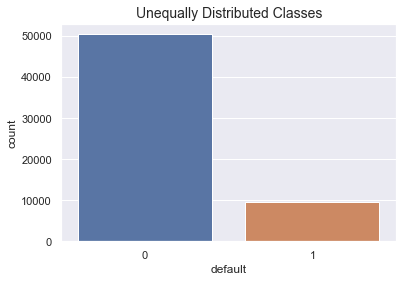

In [17]:
print('Distribution of the Classes')
print(df['default'].value_counts()/len(df))
sns.set(style='darkgrid')
sns.countplot('default', data=df)
plt.title('Unequally Distributed Classes', fontsize=14)
plt.show()

We are interested in the default value "True" (who couldn't pay the bill), which has been assigned to the value 1.

In [18]:
df.head(3)

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,0,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,0,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,...,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,0,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,...,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN


#### 2.2 Transform datetime in integer and calculating the difference between payment and loan datetime

In [19]:
df['last_payment'] = pd.to_datetime(df['last_payment'])
df['end_last_loan'] = pd.to_datetime(df['end_last_loan'])
df['time_loan_to_payment'] = (df['end_last_loan'] - df['last_payment']).dt.days
df['time_loan_to_payment']

0         396.0
1           0.0
2         181.0
3           0.0
4         151.0
          ...  
64587       0.0
64588      31.0
64589     274.0
64590    2161.0
64591       0.0
Name: time_loan_to_payment, Length: 59966, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ids                   59966 non-null  object        
 1   default               59966 non-null  int32         
 2   score_1               59966 non-null  object        
 3   score_2               59966 non-null  object        
 4   score_3               59966 non-null  float64       
 5   score_4               59966 non-null  float64       
 6   score_5               59966 non-null  float64       
 7   score_6               59966 non-null  float64       
 8   risk_rate             59966 non-null  float64       
 9   amount_borrowed       59966 non-null  float64       
 10  borrowed_in_months    59966 non-null  float64       
 11  credit_limit          41187 non-null  float64       
 12  reason                59961 non-null  object        
 13  income          

#### 2.3 Removing inconsistent data

In [21]:
df_clean = df.drop(columns = ['ids','state','zip','channel', 'job_name','sign','reason', 'gender','facebook_profile',
                              'real_state','score_1','score_2','last_payment','end_last_loan'])

In [22]:
df_clean.columns.tolist()

['default',
 'score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'amount_borrowed',
 'borrowed_in_months',
 'credit_limit',
 'income',
 'ok_since',
 'n_bankruptcies',
 'n_defaulted_loans',
 'n_accounts',
 'n_issues',
 'time_loan_to_payment']

In [23]:
df_clean.head()

,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,time_loan_to_payment
0,0,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0,396.0
1,0,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,NaN,46016.31,75.0,0.0,0.0,3.0,NaN,0.0
2,0,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,NaN,48025.47,NaN,0.0,0.0,5.0,NaN,181.0
3,0,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,NaN,46011.12,NaN,0.0,0.0,5.0,NaN,0.0
4,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0,151.0


In [24]:
df_clean.isnull().sum()

default                     0
score_3                     0
score_4                     0
score_5                     0
score_6                     0
risk_rate                   0
amount_borrowed             0
borrowed_in_months          0
credit_limit            18779
income                      0
ok_since                35089
n_bankruptcies            202
n_defaulted_loans          18
n_accounts                  0
n_issues                15580
time_loan_to_payment       80
dtype: int64

#### 2.4 Replacing the missing values 

We will mainly use the mean to replace the missing values.

In [25]:
mean = df_clean[df_clean.columns[1:]].mean()
mean

score_3                   346.435147
score_4                    99.999870
score_5                     0.498721
score_6                    99.943175
risk_rate                   0.294114
amount_borrowed         13411.805468
borrowed_in_months         40.674649
credit_limit            34093.005997
income                  71325.776783
ok_since                   35.276762
n_bankruptcies              0.077706
n_defaulted_loans           0.004671
n_accounts                 10.624571
n_issues                   11.001036
time_loan_to_payment      496.891661
dtype: float64

In [26]:
median = df_clean[df_clean.columns[1:]].median()
median

score_3                   340.000000
score_4                   100.008497
score_5                     0.497755
score_6                    99.979923
risk_rate                   0.290000
amount_borrowed         12012.400000
borrowed_in_months         36.000000
credit_limit            25338.000000
income                  60047.260000
ok_since                   32.000000
n_bankruptcies              0.000000
n_defaulted_loans           0.000000
n_accounts                 10.000000
n_issues                   10.000000
time_loan_to_payment      394.000000
dtype: float64

In [27]:
df2 = df_clean.fillna(mean)
df2.head()

,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,time_loan_to_payment
0,0,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.000000,59869.05,14.000000,1.0,0.0,9.0,9.000000,396.0
1,0,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,34093.005997,46016.31,75.000000,0.0,0.0,3.0,11.001036,0.0
2,0,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,34093.005997,48025.47,35.276762,0.0,0.0,5.0,11.001036,181.0
3,0,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,34093.005997,46011.12,35.276762,0.0,0.0,5.0,11.001036,0.0
4,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.000000,90026.17,15.000000,0.0,0.0,10.0,10.000000,151.0


In [28]:
df3 = df_clean.fillna(median)
df3.head()

,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,time_loan_to_payment
0,0,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0,396.0
1,0,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,25338.0,46016.31,75.0,0.0,0.0,3.0,10.0,0.0
2,0,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,25338.0,48025.47,32.0,0.0,0.0,5.0,10.0,181.0
3,0,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,25338.0,46011.12,32.0,0.0,0.0,5.0,10.0,0.0
4,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0,151.0


In [29]:
df2.isnull().sum()

default                 0
score_3                 0
score_4                 0
score_5                 0
score_6                 0
risk_rate               0
amount_borrowed         0
borrowed_in_months      0
credit_limit            0
income                  0
ok_since                0
n_bankruptcies          0
n_defaulted_loans       0
n_accounts              0
n_issues                0
time_loan_to_payment    0
dtype: int64

In [30]:
df2.columns

Index(['default', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'time_loan_to_payment'],
      dtype='object')

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   default               59966 non-null  int32  
 1   score_3               59966 non-null  float64
 2   score_4               59966 non-null  float64
 3   score_5               59966 non-null  float64
 4   score_6               59966 non-null  float64
 5   risk_rate             59966 non-null  float64
 6   amount_borrowed       59966 non-null  float64
 7   borrowed_in_months    59966 non-null  float64
 8   credit_limit          59966 non-null  float64
 9   income                59966 non-null  float64
 10  ok_since              59966 non-null  float64
 11  n_bankruptcies        59966 non-null  float64
 12  n_defaulted_loans     59966 non-null  float64
 13  n_accounts            59966 non-null  float64
 14  n_issues              59966 non-null  float64
 15  time_loan_to_paymen

## 3 Exploring the Features

#### 3.1 Analyzing the features 

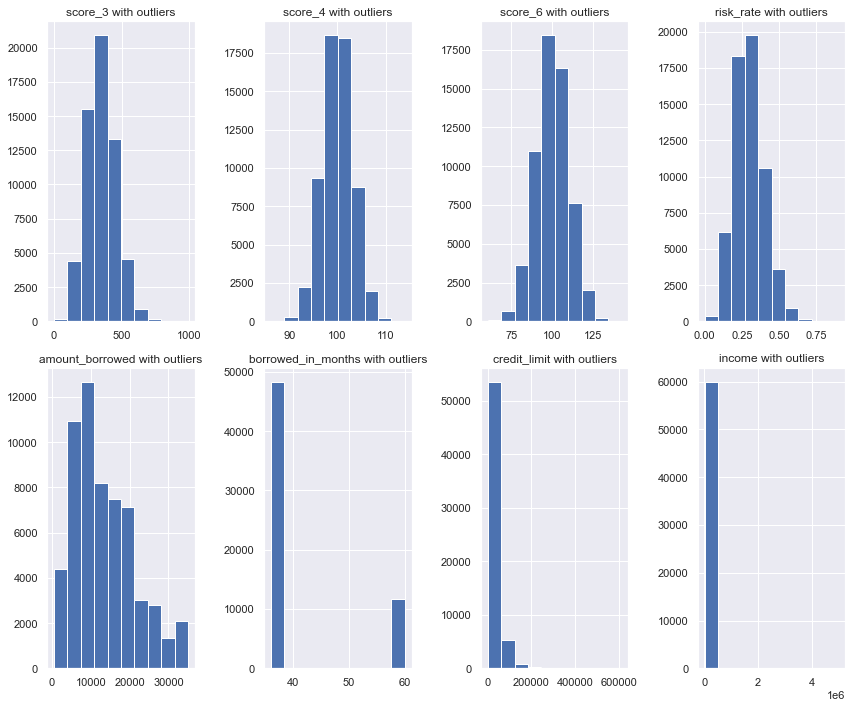

In [32]:
f, ((ax1, ax2, ax3, ax4,), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12,10))
sns.set(style='darkgrid')
ax1.hist(df2['score_3'])
ax1.set_title('score_3 with outliers', fontsize=12)
ax2.hist(df2['score_4'])
ax2.set_title('score_4 with outliers', fontsize=12)
ax3.hist(df2['score_6'])
ax3.set_title('score_6 with outliers', fontsize=12)
ax4.hist(df2['risk_rate'])
ax4.set_title('risk_rate with outliers', fontsize=12)
ax5.hist(df2['amount_borrowed'])
ax5.set_title('amount_borrowed with outliers', fontsize=12)
ax6.hist(df2['borrowed_in_months'])
ax6.set_title('borrowed_in_months with outliers', fontsize=12)
ax7.hist(df2['credit_limit'])
ax7.set_title('credit_limit with outliers', fontsize=12)
ax8.hist(df2['income'])
ax8.set_title('income with outliers', fontsize=12)
f.tight_layout()
plt.show()

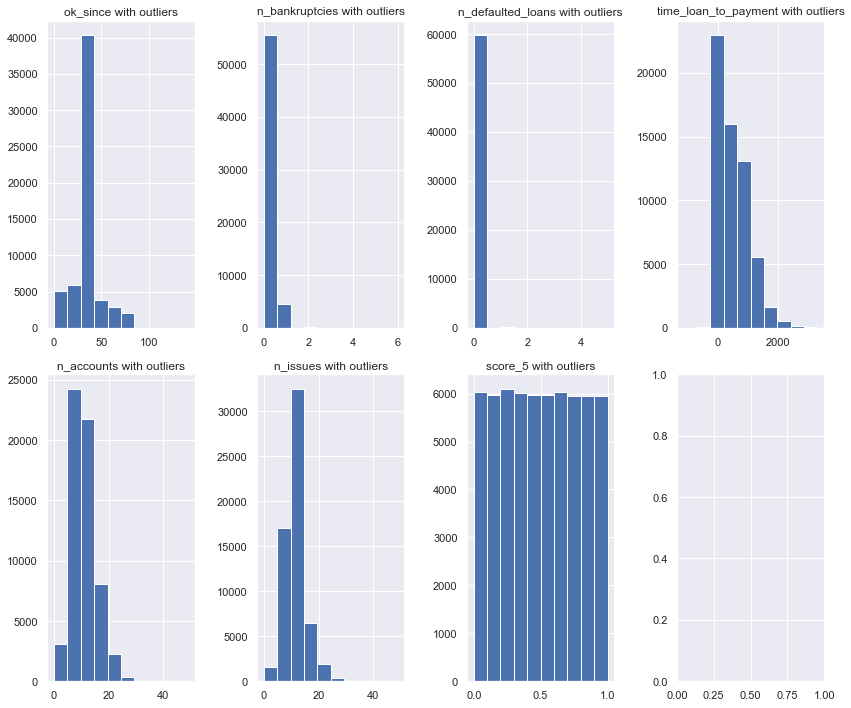

In [33]:
f, ((ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(2, 4, figsize=(12,10))
sns.set(style='darkgrid')
ax9.hist(df2['ok_since'])
ax9.set_title('ok_since with outliers', fontsize=12)
ax10.hist(df2['n_bankruptcies'])
ax10.set_title('n_bankruptcies with outliers', fontsize=12)
ax11.hist(df2['n_defaulted_loans'])
ax11.set_title('n_defaulted_loans with outliers', fontsize=12)
ax12.hist(df2['time_loan_to_payment'])
ax12.set_title('time_loan_to_payment with outliers', fontsize=12)
ax13.hist(df2['n_accounts'])
ax13.set_title('n_accounts with outliers', fontsize=12)
ax14.hist(df2['n_issues'])
ax14.set_title('n_issues with outliers', fontsize=12)
ax15.hist(df2['score_5'])
ax15.set_title('score_5 with outliers', fontsize=12)
f.tight_layout()
plt.show()

#### 3.2 Inpecting the degree of skewness and tailedness in each feature (which feature has a normal distribution?)

Calculating the skew (a measure of symmetry) for each fetaure.

In [34]:
df2.drop('default', axis=1).skew().sort_values()

score_4                 -0.015951
score_6                 -0.012761
score_5                  0.007547
score_3                  0.333327
risk_rate                0.485219
ok_since                 0.673148
amount_borrowed          0.820532
n_accounts               0.950064
time_loan_to_payment     1.005173
n_issues                 1.103287
borrowed_in_months       1.541456
credit_limit             3.357284
n_bankruptcies           3.966369
income                  19.905790
n_defaulted_loans       21.836529
dtype: float64

Calculating the Kurtosis (a measure of tailedness) for each feature

In [35]:
df2.drop('default', axis=1).kurt().sort_values()

score_5                   -1.197337
score_6                   -0.000446
score_4                    0.012716
score_3                    0.128177
amount_borrowed            0.131441
risk_rate                  0.316470
borrowed_in_months         0.376099
time_loan_to_payment       0.880317
n_accounts                 1.666215
ok_since                   2.352053
n_issues                   3.253593
credit_limit              23.197213
n_bankruptcies            23.608648
n_defaulted_loans        665.023834
income                  1484.441185
dtype: float64

The features "credit_limit" , "n_bankruptcies", "n_defaulted_loans" and "income" deviate significantly from 0 kurtosis and have some degree of skewness, which means that the distribution of theses features deviate from a normal (Gaussian) distribution.

Removing the feature "score_5", since the distribution is almost uniform and will not affect the result.

In [36]:
df2_clean = df2.drop(columns = ['score_5'])

In [37]:
df2_clean.columns

Index(['default', 'score_3', 'score_4', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'time_loan_to_payment'],
      dtype='object')

## 4 Dealing with Outliers

#### 4.1 Removing the outliers using the Z-score

In ordet to simplify the analysis, we are going to apply this method only for the features that have high degree of normality (gaussian). Thus, we do not need to transform the distribution that are not gaussian.

In [38]:
from scipy import stats as st
list = ['score_3', 'score_4', 'score_6', 'risk_rate']
#df_numeric = df2_clean.select_dtypes(include=[np.number])
z = np.abs(st.zscore(df2_clean[list]))
filtered_entries = (z < 3.0).all(axis=1)
new_df2 = df2_clean[filtered_entries]

In [39]:
len(new_df2)

59084

In [40]:
len(df2_clean)

59966

In [41]:
x = 100*(len(df2)-len(new_df2))/len(df2_clean)
print("The percentage of removed data by z-score was %.2f%%" %x)

The percentage of removed data by z-score was 1.47%


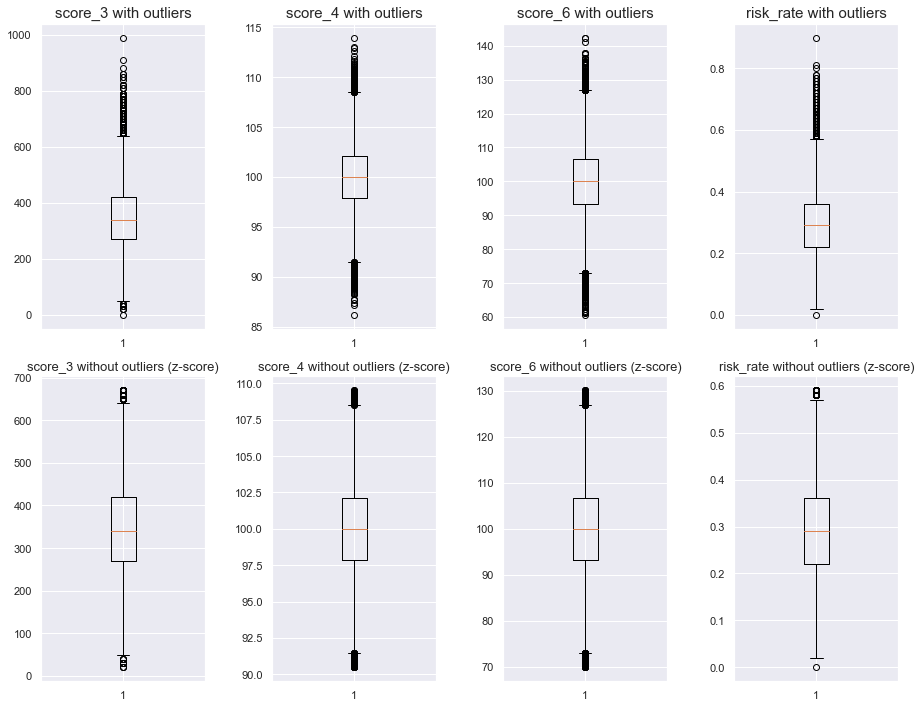

In [42]:
f, ((ax1, ax2, ax3, ax4),((ax5, ax6, ax7, ax8))) = plt.subplots(2, 4, figsize=(13,10))

sns.set(style='darkgrid')
ax1.boxplot(df2_clean['score_3'])
ax1.set_title('score_3 with outliers', fontsize=15)
ax2.boxplot(df2_clean['score_4'])
ax2.set_title('score_4 with outliers', fontsize=15)
ax3.boxplot(df2_clean['score_6'])
ax3.set_title('score_6 with outliers', fontsize=15)
ax4.boxplot(df2_clean['risk_rate'])
ax4.set_title('risk_rate with outliers', fontsize=15)

ax5.boxplot(new_df2['score_3'])
ax5.set_title('score_3 without outliers (z-score)', fontsize=13)
ax6.boxplot(new_df2['score_4'])
ax6.set_title('score_4 without outliers (z-score)', fontsize=13)
ax7.boxplot(new_df2['score_6'])
ax7.set_title('score_6 without outliers (z-score)', fontsize=13)
ax8.boxplot(new_df2['risk_rate'])
ax8.set_title('risk_rate without outliers (z-score)', fontsize=13)
f.tight_layout()
plt.show()

#### 4.2 Removing the outliers using Quantiles (IQR score)

Applying this method only for the features that have high degree of normality.

In [43]:
Q1 = new_df2.quantile(0.25)
Q3 = new_df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
list2 = ['score_3', 'score_4', 'score_6', 'risk_rate']

default                     0.000000
score_3                   150.000000
score_4                     4.268460
score_6                    13.439155
risk_rate                   0.140000
amount_borrowed         10810.520000
borrowed_in_months          0.000000
credit_limit            17759.750000
income                  41010.472500
ok_since                    0.000000
n_bankruptcies              0.000000
n_defaulted_loans           0.000000
n_accounts                  6.000000
n_issues                    3.000000
time_loan_to_payment      794.000000
dtype: float64


In [44]:
outliers = ((new_df2[list2] < (Q1 - 1.3 * IQR)) | (new_df2[list2] > (Q3 + 1.3 * IQR)))
outliers.sum()
#Number of outliers per column

amount_borrowed           0
borrowed_in_months        0
credit_limit              0
default                   0
income                    0
n_accounts                0
n_bankruptcies            0
n_defaulted_loans         0
n_issues                  0
ok_since                  0
risk_rate               560
score_3                 561
score_4                 794
score_6                 788
time_loan_to_payment      0
dtype: int64

In [45]:
outliers.sum().sum()
#Total number of outliers

2703

In [46]:
df_out = new_df2[~outliers.any(axis=1)]

In [47]:
len(df_out)

56419

In [48]:
x = 100 - 100*(len(df_out)/len(new_df2))

print("The percentage of removed data by IQR score was %.2f%%" %x)

The percentage of removed data by IQR score was 4.51%


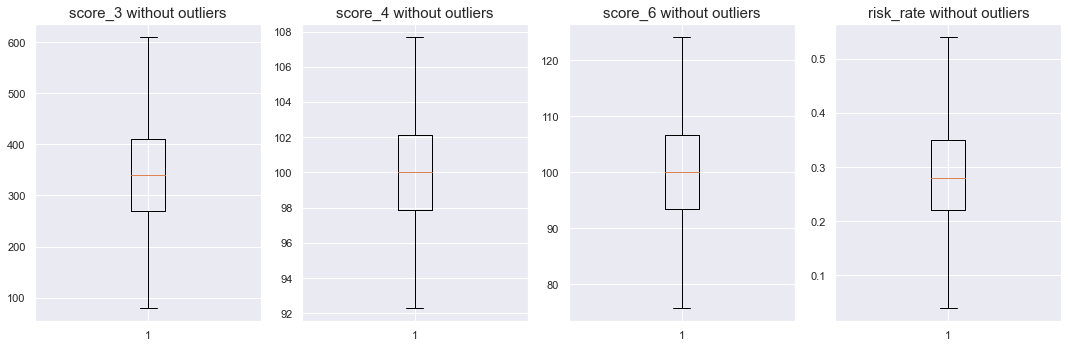

In [49]:
f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(15,5))
sns.set(style='darkgrid')
ax1.boxplot(df_out['score_3'])
ax1.set_title('score_3 without outliers', fontsize=15)
ax2.boxplot(df_out['score_4'])
ax2.set_title('score_4 without outliers', fontsize=15)
ax3.boxplot(df_out['score_6'])
ax3.set_title('score_6 without outliers', fontsize=15)
ax4.boxplot(df_out['risk_rate'])
ax4.set_title('risk_rate without outliers', fontsize=15)
f.tight_layout()
plt.show()

In [50]:
p = 100 - 100*(len(df_out)/len(df))

print("The total percentage of removed data by the two methods was %.2f%%" %p)

The total percentage of removed data by the two methods was 5.92%


In [51]:
df_out.columns

Index(['default', 'score_3', 'score_4', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'time_loan_to_payment'],
      dtype='object')

#### 4.3 Checking the distribution of labels after removing the outliers

Dataset with outliers

In [52]:
total_len = len(df_clean)
percentage_labels = (df_clean['default'].value_counts()/total_len)*100
print(percentage_labels)
print(total_len) 

0    84.141013
1    15.858987
Name: default, dtype: float64
59966


Dataset without outliers (Z-score)

In [53]:
total_len = len(new_df2)
percentage_labels = (new_df2['default'].value_counts()/total_len)*100
print(percentage_labels)
print(total_len) 

0    84.20723
1    15.79277
Name: default, dtype: float64
59084


Dataset without outliers (IQR-score)

In [54]:
total_len = len(df_out)
percentage_labels = (df_out['default'].value_counts()/total_len)*100
print(percentage_labels)
print(total_len) 

0    84.287208
1    15.712792
Name: default, dtype: float64
56419


## 5 Correlation and Feature Importance

#### 5.1 Correlation

The correlation between the target and attributes.

In [55]:
corre = df_out.corr()
corre['default'].sort_values(ascending=False)

default                 1.000000
time_loan_to_payment    0.329868
borrowed_in_months      0.184018
risk_rate               0.092968
amount_borrowed         0.066302
score_3                 0.048709
n_issues                0.017356
n_bankruptcies          0.014476
n_accounts              0.014034
score_4                 0.005047
score_6                 0.001877
n_defaulted_loans       0.000409
ok_since               -0.001952
credit_limit           -0.013849
income                 -0.046623
Name: default, dtype: float64

Let's see the degree of dependence between the features.

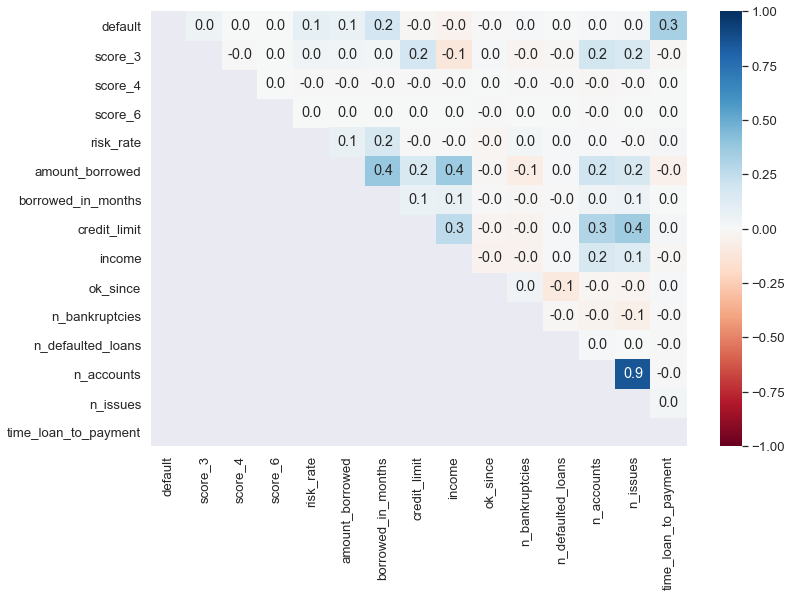

In [56]:
correlation = df_out.corr()
mask = np.tril(correlation)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(correlation, mask=mask, annot=True, fmt=".1f",  cmap="RdBu", vmin=-1, vmax=1)
plt.show()

#### 5.2 Feature Importance

In [57]:
x = df_out.drop('default', axis = 1)
y = df_out['default']
y.unique()

array([0, 1])

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=2, max_features='auto', verbose=0)
RF.fit(x, y)

RandomForestClassifier(criterion='entropy')

In [59]:
RF.feature_importances_
targets = df_out.columns[1:]
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, targets[i],importances[indices[i]]))

 1) score_3                        0.246486
 2) score_4                        0.100750
 3) score_6                        0.093475
 4) risk_rate                      0.088169
 5) amount_borrowed                0.087588
 6) borrowed_in_months             0.068768
 7) credit_limit                   0.068497
 8) income                         0.065776
 9) ok_since                       0.048097
10) n_bankruptcies                 0.047277
11) n_defaulted_loans              0.042865
12) n_accounts                     0.033702
13) n_issues                       0.007844
14) time_loan_to_payment           0.000705


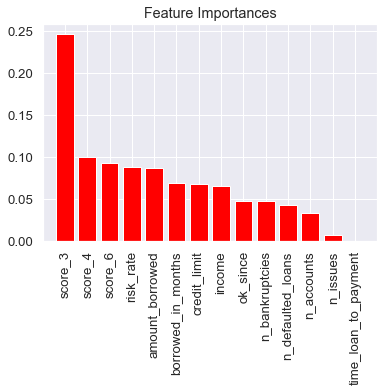

In [60]:
plt.title('Feature Importances')
plt.bar(range(x.shape[1]),importances[indices], color="red", align="center")
plt.xticks(range(x.shape[1]),targets, rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

The feature importance shows that "score_3" could has the highest impact in the default.

## 6 Splitting the dataset in train and test

#### 6.1 Applying the SMOTE technique to deal with the imbalanced datasets

In order to avoid overfitting during the training process, due to the imbalanced train dataset, we are going to resample
the train dataset using SMOTE (Synthetic Minority Oversampling Technique). Basically, SMOTE will upsampling the minority class
by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. <br/>
*This process will be applied only in the train dataset, the test dataset (which will remain imbalanced) have already been separated before to evaluate the final model's performance in the end.*

In [61]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Separate input features and target
y = df_out.default
x = df_out.drop('default', axis=1)

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# transforming the train dataset in a balanced dataset to avoid overfitting (SMOTE - Synthetic Minority Oversampling)
sm = SMOTE(random_state=1)
x_train, y_train = sm.fit_sample(x_train, y_train)

## 7 Feature Scaling

Feature scaling is important for the kNN model, but did not affect Logistic Regression or Random Forest models. However, in order to simplify the analysis we are going to use the same scaled feature in all models. It was used Standardization.

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)
x_train_transformed = df_train_scaled
df_test_scaled = pd.DataFrame(scaler.fit_transform(x_test),columns = x_test.columns)
x_test_transformed = df_test_scaled

In [63]:
x_train_transformed.head(3)

,score_3,score_4,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,time_loan_to_payment
0,0.439460,-0.566647,0.400045,1.267507,1.498210,1.790819,-0.686612,-0.144390,-2.234341,-0.302579,-0.06504,0.079822,-0.011394,0.149317
1,-0.795939,-1.347036,0.700840,-1.791669,0.878850,-0.634023,-0.123136,0.632779,0.005338,-0.302579,-0.06504,1.239677,1.339787,-1.269301
2,1.366010,0.095634,0.458313,-0.545338,1.657637,1.790819,-0.325838,0.015128,0.005338,-0.302579,-0.06504,0.543764,0.529079,0.207537


In [64]:
x_test_transformed.head(3)

,score_3,score_4,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,time_loan_to_payment
0,1.530579,-0.707401,-0.054374,-0.620927,-0.102326,-0.482654,0.266442,-0.479112,-1.392494,-0.278852,-0.056428,0.515727,0.503231,-0.739319
1,-0.292224,1.507228,-0.229315,-0.094982,1.119803,2.071879,0.004710,-0.019494,0.007502,-0.278852,-0.056428,-1.014561,-0.006152,0.228424
2,0.954957,0.530289,-0.118462,-1.357251,-1.548318,-0.482654,0.004710,15.533965,0.007502,-0.278852,-0.056428,0.952953,-0.006152,-0.982250


## 8 Training the baseline models

#### 8.1 Setting the model (kNN) and training

In [65]:
from sklearn.neighbors import KNeighborsClassifier
# setting the model
kNN = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski', metric_params=None)
# training the model
kNN.fit(x_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=7)

#### 8.2 Setting the model (Logistic Regression) and training

In [66]:
from sklearn.linear_model import LogisticRegression
# setting the model
LR = LogisticRegression(penalty='l1', dual=False, tol=0.00001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, solver='liblinear', max_iter=50000)
# training the model
LR.fit(x_train_transformed, y_train)

LogisticRegression(max_iter=50000, penalty='l1', solver='liblinear', tol=1e-05)

#### 8.3 Setting the model (Random Forest) and training

In [67]:
from sklearn.ensemble import RandomForestClassifier
# setting the model
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', n_jobs=1, random_state=1, verbose=0)
# training the model
RF.fit(x_train_transformed, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=1, random_state=1)

#### 8.4 Setting the model (Naive Bayes) and training

In [68]:
from sklearn.naive_bayes import GaussianNB
# setting the model
GNB = GaussianNB()
# training the model
GNB = GNB.fit(x_train_transformed, y_train)

#### 8.5 Setting the model (Support Vector Machines - SVM) and training

In [69]:
from sklearn.svm import SVC
# setting the model
SVM = SVC(C=1, kernel='rbf', class_weight='balanced', random_state = 1)
# training the model
SVM.fit(x_train_transformed, y_train)

SVC(C=1, class_weight='balanced', random_state=1)

## 9 Cross-validation (choosing the best models)

**NOTE 1:** Here it is important to mention that the upsampling has to be done inside the cross-validation, otherwise it will overfit. To accomplish that, we are going to use the imblearn library, which will help us to do these multiple steps at once using a pipeline.

#### Which metric should we use?

We are interested in the ability to detect who will not be able to pay the credit card, i.e., the **True or 1** in default (here this is the positive).<br/>
Remembering:<br/>

- **Recall (or sensitivity):** is the number of true positives divided by the number of true positive and false negatives values. *High recall indicates a low number of false negatives, i.e., we are prediciting a major proportion of the positive class.*

- **Precision (or accuracy):** is the number of true positives divided by all positive predictions. *Low precision indicates a high number of false positives, i.e., we are not really sure about the class predicted.*

- **F1 score:** is the harmonic average of precision and recall.

Therefore, in order to maximize the number of defaults detected, even if we generate some false positives (what could be verified by the bank after),
we are going to use recall as the evaluation metric to optimize the parameters. Thus, we will be predicting as many defaults as possible. <br/>

**NOTE 2:** Of course, there is an *Precision/Recall Tradeoff: more positive we can detect, less sure we could be, and vice-versa.* We could use F1 score to better optimize recall and precision, but here I am supossing that detecting all the defaulting clients in a first moment is the major task. If we detect some false positive (clients that are able to pay the bill and is assigned as a future defaulting client) this could be checked by the bank in another process.

#### 9.1 Estimating the Recall score using 10-Fold cross-validation (and SMOTE to resampling the imbalanced train dataset)

In [70]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=False)

In [71]:
kNN_pipeline_score = make_pipeline(sm, kNN) 
kNN_score = cross_val_score(kNN_pipeline_score, x_train_transformed, y_train, scoring='recall', cv=kf)
# using recall the score computed for each fold will be the recall of the positive class (minority class in this case)
kNN_recall = kNN_score.mean()
kNN_std = kNN_score.std()                                   

In [72]:
RF_pipeline_score = make_pipeline(sm, RF) 
RF_score = cross_val_score(RF_pipeline_score, x_train_transformed, y_train, scoring='recall', cv=kf)
RF_recall = RF_score.mean()
RF_std = RF_score.std()

In [73]:
LR_pipeline_score = make_pipeline(sm, LR) 
LR_score = cross_val_score(LR_pipeline_score, x_train_transformed, y_train, scoring='recall', cv=kf)
LR_recall = LR_score.mean()
LR_std = LR_score.std()  

In [74]:
GNB_pipeline_score = make_pipeline(sm, GNB) 
GNB_score = cross_val_score(GNB_pipeline_score, x_train_transformed, y_train, scoring='recall', cv=kf)
GNB_recall = GNB_score.mean()
GNB_std = GNB_score.std() 

In [75]:
SVM_pipeline_score = make_pipeline(sm, SVM) 
SVM_score = cross_val_score(SVM_pipeline_score, x_train_transformed, y_train, scoring='recall', cv=kf)
SVM_recall = SVM_score.mean()
SVM_std = SVM_score.std()

In [76]:
models_performance = pd.DataFrame({
    'Model': ['kNN', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'SVM'],
    'Mean Recall': [kNN_recall, RF_recall, LR_recall, GNB_recall, SVM_recall],
    'Uncertainty (+/-)': [kNN_std, RF_std, LR_std, GNB_std, SVM_std]})

pd.options.display.float_format = '{:,.2f}'.format
models_performance.sort_values(by='Mean Recall', ascending=False)

,Model,Mean Recall,Uncertainty (+/-)
0,kNN,0.88,0.05
4,SVM,0.76,0.11
1,Random Forest,0.76,0.18
3,Naive Bayes,0.76,0.06
2,Logistic Regression,0.73,0.02


Therefore, the model kNN has provided the best results with these initial set of parameters. No significant difference has been seen between the other models. We should mention here that SVM takes a long time to be trained, compared to the other three algorithms (RF, Naive Bayes and Logistic Regression) and also that tree-based algorithms like Random Forest, in principle, should perform well on imbalanced datasets because their hierarchical structure allow them to learn signals from both classe.<br/><br/> Thus, in order to spend less time in the training process and enhance the performance, we are going to proceed using Random Forest and kNN for training and optimize their hyperparameters. Moreover, we will also study they combined and look if we can improve the results.

## 10 Perfoming the hyperparameter optimization for the best models

#### 10.1 Using 10-Fold Cross-Validation in RandomizedSearchCV

As previously discussed, we have an imbalanced dataset. Thus, we are going to use Recall as the evaluation metric to optimize the hyperparameters.

In [77]:
kNN_pipeline_score.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'kneighborsclassifier', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])

In [78]:
RF_pipeline_score.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'randomforestclassifier', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [79]:
SVM_pipeline_score.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'svc', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

#### 10.2 Optimizing hyperameters for kNN model

In [144]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=10, shuffle=False)

In [83]:
k_range = np.arange(1, 15)
param_dist = {'kneighborsclassifier__n_neighbors': k_range}
kNN_rand_imba = RandomizedSearchCV(kNN_pipeline_score, param_dist, cv=kf, scoring='recall', return_train_score=True, n_iter=5)
kNN_rand_imba.fit(x_train_transformed, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=1)),
                                             ('kneighborsclassifier',
                                              KNeighborsClassifier(n_neighbors=7))]),
                   n_iter=5,
                   param_distributions={'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   return_train_score=True, scoring='recall')

In [84]:
kNN_rand_imba.best_score_

0.8816809126102138

In [85]:
kNN_rand_imba.best_params_

{'kneighborsclassifier__n_neighbors': 7}

In [86]:
kNN_rand_imba.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

#### 10.3 Optimizing hyperameters for Random Forest model

In [87]:
N = np.arange(1, 500)
param_dist = {'randomforestclassifier__n_estimators': N}
RF_rand_imba = RandomizedSearchCV(RF_pipeline_score, param_dist, cv=kf, scoring='recall', return_train_score=True, n_iter=5)
RF_rand_imba.fit(x_train_transformed, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=1)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(criterion='entropy',
                                                                     n_jobs=1,
                                                                     random_state=1))]),
                   n_iter=5,
                   param_distributions={'randomforestclassifier__n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  1...
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       4

In [88]:
RF_rand_imba.best_score_

0.7682676392423532

In [89]:
RF_rand_imba.best_params_

{'randomforestclassifier__n_estimators': 379}

In [90]:
RF_rand_imba.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=379,
                                        n_jobs=1, random_state=1))])

#### 10.4 Training the models with the help of the best hyperparameters

In [91]:
bestModelkNNFitted = kNN_rand_imba.best_estimator_.fit(x_train_transformed, y_train)
bestModelRFFitted = RF_rand_imba.best_estimator_.fit(x_train_transformed, y_train)

## 11 Combining the best two models to perhaps boost the performance

#### 11.1 Setting the combined model (kNN and Random Forest) and training

In [161]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=[('kNN', bestModelkNNFitted), 
                                ('RF', bestModelRFFitted)], voting='soft',weights=[5,1])
combined_models = VC.fit(x_train_transformed, y_train)

## 12 Evaluating the model's real performance (test dataset)

#### 12.1 Making predictions in the test dataset

In [162]:
y_test_predicted_RF = bestModelRFFitted.predict(x_test_transformed)
y_test_predicted_kNN = bestModelkNNFitted.predict(x_test_transformed)
y_test_predicted = combined_models.predict(x_test_transformed)

#### 12.2 The final performance: the confusion matrices

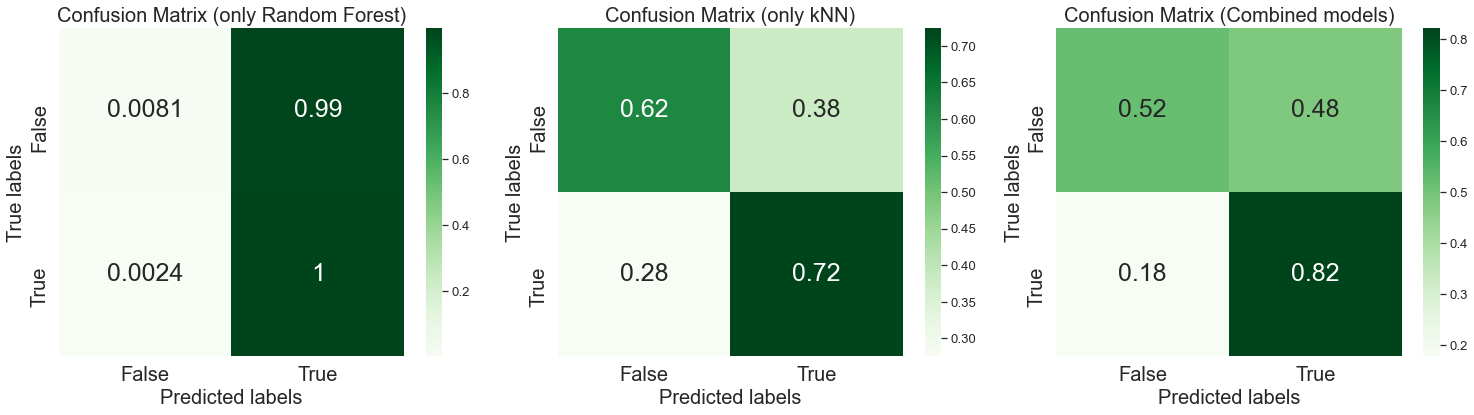

In [163]:
from sklearn.metrics import confusion_matrix, classification_report

f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(21,6))

cnf_matrix1 = confusion_matrix(y_test, y_test_predicted_RF)
cnf_matrix1 = cnf_matrix1.astype('float') / cnf_matrix1.sum(axis=1)[:, np.newaxis]
cnf_matrix2 = confusion_matrix(y_test, y_test_predicted_kNN)
cnf_matrix2 = cnf_matrix2.astype('float') / cnf_matrix2.sum(axis=1)[:, np.newaxis]
cnf_matrix3 = confusion_matrix(y_test, y_test_predicted)
cnf_matrix3 = cnf_matrix3.astype('float') / cnf_matrix3.sum(axis=1)[:, np.newaxis]

ax1 = sns.heatmap(cnf_matrix1, ax=ax1, annot=True, annot_kws={"size":25}, cmap = "Greens")
ax1.set_xlabel('Predicted labels', size=20)
ax1.set_ylabel('True labels', size=20)
ax1.set_title('Confusion Matrix (only Random Forest)', size=20)
ax1.xaxis.set_ticklabels((le.classes_), size=20); ax1.yaxis.set_ticklabels((le.classes_), size=20)

ax2 = sns.heatmap(cnf_matrix2, ax=ax2, annot=True,  annot_kws={"size":25}, cmap = "Greens")
ax2.set_xlabel('Predicted labels', size=20)
ax2.set_ylabel('True labels', size=20)
ax2.set_title('Confusion Matrix (only kNN)', size=20)
ax2.xaxis.set_ticklabels((le.classes_), size=20); ax2.yaxis.set_ticklabels((le.classes_), size=20)

ax3 = sns.heatmap(cnf_matrix3, ax=ax3, annot=True,  annot_kws={"size":25}, cmap = "Greens")
ax3.set_xlabel('Predicted labels', size=20)
ax3.set_ylabel('True labels', size=20)
ax3.set_title('Confusion Matrix (Combined models)', size=20)
ax3.xaxis.set_ticklabels((le.classes_), size=20); ax3.yaxis.set_ticklabels((le.classes_), size=20 )

f.tight_layout()
plt.show()

#### 12.3 Classification report for Random Forest

In [164]:
print(classification_report(y_test, y_test_predicted_RF))

              precision    recall  f1-score   support

           0       0.95      0.01      0.02      9606
           1       0.15      1.00      0.26      1678

    accuracy                           0.16     11284
   macro avg       0.55      0.50      0.14     11284
weighted avg       0.83      0.16      0.05     11284



#### 12.4 Classification report for kNN

In [165]:
print(classification_report(y_test, y_test_predicted_kNN))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      9606
           1       0.25      0.72      0.37      1678

    accuracy                           0.64     11284
   macro avg       0.59      0.67      0.56     11284
weighted avg       0.83      0.64      0.69     11284



#### 12.5 Classification report for the combined models

In [166]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67      9606
           1       0.23      0.82      0.36      1678

    accuracy                           0.56     11284
   macro avg       0.59      0.67      0.51     11284
weighted avg       0.84      0.56      0.62     11284



Remembering:
- **1 - positive class (defaulting client)**
- 0 - negative class (client who has paid his bill)

## 13 Summary

   Therefore, we can see that the combined model offers the best performance for classifying a major proportion of defaulting clients (recall = 0.82) with a precision almost similar to the kNN model (precission = 0.23). Althought the Random Forest predict all defaulting clients, the accuracy is so low, that there is no gain in informartion, since this model is pratically classifying everyone as defaulting customer.<br/><br/>
   The main drawback in this project is the fact that the dataset is highly imbalanced, hence, applying other resampling techniques could improve the results. In addition, using more complex algorithms as Artificial Neural Networks, Adaptative Boosting, treating more extensively the outliers of the other features, performing feature engineering and/or an extensive hyparameters optimization could improve the results, which depend on your interest and goal.<br/><br/>
Here, we have set our goal as predicting all possible defaulting clients with some accuracy, and this has been achieved by the combined model. 

## 14 Saving the Classifier (Final Model)

#### 14.1 Saving the best trained model

In [151]:
import pickle
pickle.dump(bestModelRFFitted, open('Final_Model.sav', 'wb'))

#### 14.2 Saving the predict class probabilities for test dataset

In [152]:
test_labels_proba = bestModelRFFitted.predict_proba(x_test_transformed)

In [153]:
output = pd.DataFrame({'ID':x_test_transformed.index, 'probability of being a defaulting customer':test_labels_proba[:,1]})

In [154]:
output.to_csv("./predictions.csv", index=False)